## Linear Regression

## Linear Regression Workflow Diagram and Math

## Linear Regression Implementation from Scratch

### import modules

In [28]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

### Prepare data
dataset obtained from kaggle: [here](https://www.kaggle.com/quantbruce/real-estate-price-prediction)

Read csv file by using panda module

In [29]:
real_estate = pd.read_csv('/Users/hadley/Documents/pytorch/resources/real_estate.csv')

drop dataset first column since it only containes index number of each rows

In [30]:
real_estate = real_estate.drop(['No'],axis=1)
print(real_estate.shape)
print(real_estate.info())

(414, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB
None


Data splitting to training and testing model

In [31]:
data_train, data_test = train_test_split(real_estate, train_size=0.70, test_size = 0.30, random_state=100)
print(data_train.shape, data_test.shape)

(289, 7) (125, 7)


Split data for input, output and standardize input data

In [32]:
y_train = data_train.pop('Y house price of unit area')
x_train = data_train
x_train = (x_train - x_train.mean())/(x_train.max()-x_train.min())

y_test = data_test.pop('Y house price of unit area')
x_test = data_test
x_test = (x_test - x_test.mean())/(x_test.max()-x_test.min())

Initialize weights and bias

In [33]:
input_size = x_train.shape[1]
w = np.zeros((input_size,))
b = 0

### Model prediction: forward pass

In [34]:
def forward(x):
    return np.dot(x, w) + b

### Loss function

In [35]:
def loss(y, y_predicted):
    square = np.square(y_predicted.T-y.T)
    return square.mean()*(1/2)

### Gradient Calculation

In [36]:

def gradient_weight(x,y,y_predicted):
    dw = (1/input_size)*np.dot(x.T, y_predicted-y)
    return dw

def gradient_bias(x,y,y_predicted):
    db = (1/input_size)*np.sum(y_predicted-y)
    return db

### Training Model

In [37]:
learning_rate = 0.01
n_iters = 100

prepare list for future plot

In [38]:
plt_x = []
plt_y1 = []
plt_y2 = []

In [39]:
for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = forward(x_train)

    #loss
    l = loss(y_train, y_pred)
    # print(l)
    # print(l.dtype)

    #gradients
    dw = gradient_weight(x_train, y_train, y_pred)
    db = gradient_bias(x_train, y_train, y_pred)

    #update wrights
    w -= learning_rate * dw
    b -= learning_rate * db

    # if epoch % 1 ==0:
    #     print(f'epoch {epoch+1}: w={w}, loss = {l:.4f}')
    
    ##prepare plot data
    plt_x.append(epoch)
    plt_y1.append(l)

    y_test_p = forward(x_test)
    l_p = loss(y_test, y_test_p)
    plt_y2.append(l_p)

In [40]:
### Result and plot analysis

#### Loss curve, learning and prediction result with respect on epochs

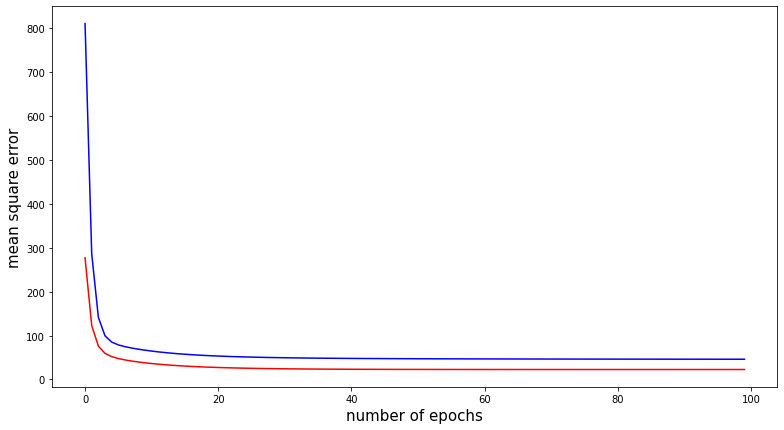

In [60]:
plt.plot(plt_x, plt_y1, 'b')
plt.plot(plt_x, plt_y2, 'r')
plt.xlabel("number of epochs", fontsize=15)
plt.ylabel("mean square error", fontsize=15)
plt.rcParams["figure.figsize"] = (12,7)
plt.show()

Final result and evaluation by using r2 score
r2 = 1-(np.sum((y_predicted-y)**2)/np.sum((y-y.mean())**2))

In [42]:
y_test_pred = forward(x_test)
result = r2_score(y_true=y_test,y_pred=y_test_pred)
print(result)

0.6750734862366894


Final plot to check distance between predicted value and observation with repect to each feature

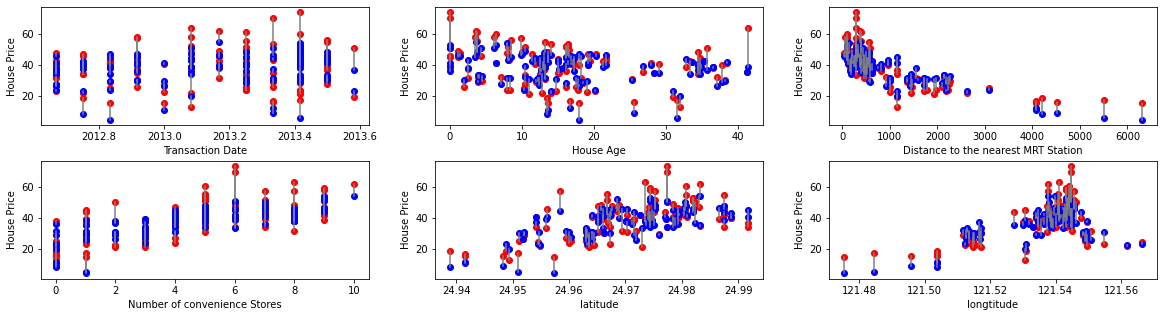

In [47]:
x_labels = ['Transaction Date','House Age','Distance to the nearest MRT Station','Number of convenience Stores','latitude','longtitude']
y_label = 'House Price'
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(data_test.iloc[:,i], y_test, 'ro')
    plt.plot(data_test.iloc[:,i], y_test_pred, 'bo')
    plt.plot((data_test.iloc[:,i],data_test.iloc[:,i]), (y_test,y_test_pred), c='grey')
    plt.xlabel(x_labels[i],fontsize=10)
    plt.ylabel(y_label,fontsize=10)
plt.rcParams["figure.figsize"] = (20,5)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
plt.show()